In [1]:
import codecs
import json
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def centroid(vertexes):
     _x_list = [vertex [0] for vertex in vertexes]
     _y_list = [vertex [1] for vertex in vertexes]
     _len = len(vertexes)
     _x = sum(_x_list) / _len
     _y = sum(_y_list) / _len
     return [_x, _y]

In [3]:
i = 0
for line in codecs.open("geolocalizados.json", 'r', 'utf8'):
    try:
        tweet = json.loads(line)
        if (tweet['coordinates'] != None) and (("corona" in tweet['text']) or ("covid" in tweet['text']) or ("coronavírus" in tweet['text']) or
            ("covid19" in tweet['text']) or ("covid-19" in tweet['text']) or ("sars" in tweet['text']) or
            ("coronavirus" in tweet['text'])):
            feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': tweet['coordinates']['coordinates'],
            },
            'properties': {
                'id': tweet['id'],
                'text': tweet['text'],
                'id_user': tweet['user']['id'],
                'name': tweet['user']['name']
            }
            }
            
            json.dumps(feature)
            with open('coordinates.geojson', 'w') as stream:
                json.dump(feature, stream, indent=2)
            if i == 0:
                twts = gpd.read_file('coordinates.geojson')
            else: 
                df = gpd.read_file('coordinates.geojson')
                twts = twts.append(df)
            i += 1
        if i >= 5000:
            break
    except:
        continue
        

In [4]:
i = 0
for line in codecs.open("geolocalizados.json", 'r', 'utf8'):
    try:
        tweet = json.loads(line)
        if (tweet['coordinates'] == None) and (tweet['place'] != None) and (("corona" in tweet['text']) or 
           ("covid" in tweet['text']) or ("coronavírus" in tweet['text']) or
           ("covid19" in tweet['text']) or ("covid-19" in tweet['text']) or ("sars" in tweet['text']) or
           ("coronavirus" in tweet['text'])):
            for j in tweet['place']['bounding_box']['coordinates']:
                lista = j
            place = centroid(lista)
            feature = {
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': place,
                },
                'properties': {
                    'id': tweet['id'],
                    'text': tweet['text'],
                    'id_user': tweet['user']['id'],
                    'name': tweet['user']['name']
                }
                }
            
            json.dumps(feature)
            with open('coordinates.geojson', 'w') as stream:
                json.dump(feature, stream, indent=2)
            df = gpd.read_file('coordinates.geojson')
            twts = twts.append(df)
            i += 1
        if i >= 15000:
            break
    except:
        continue

In [5]:
mapa_mun = gpd.read_file("map/BR_Municipios_2019.shp")
mapa_est = gpd.read_file("map/BR_UF_2019.shp")

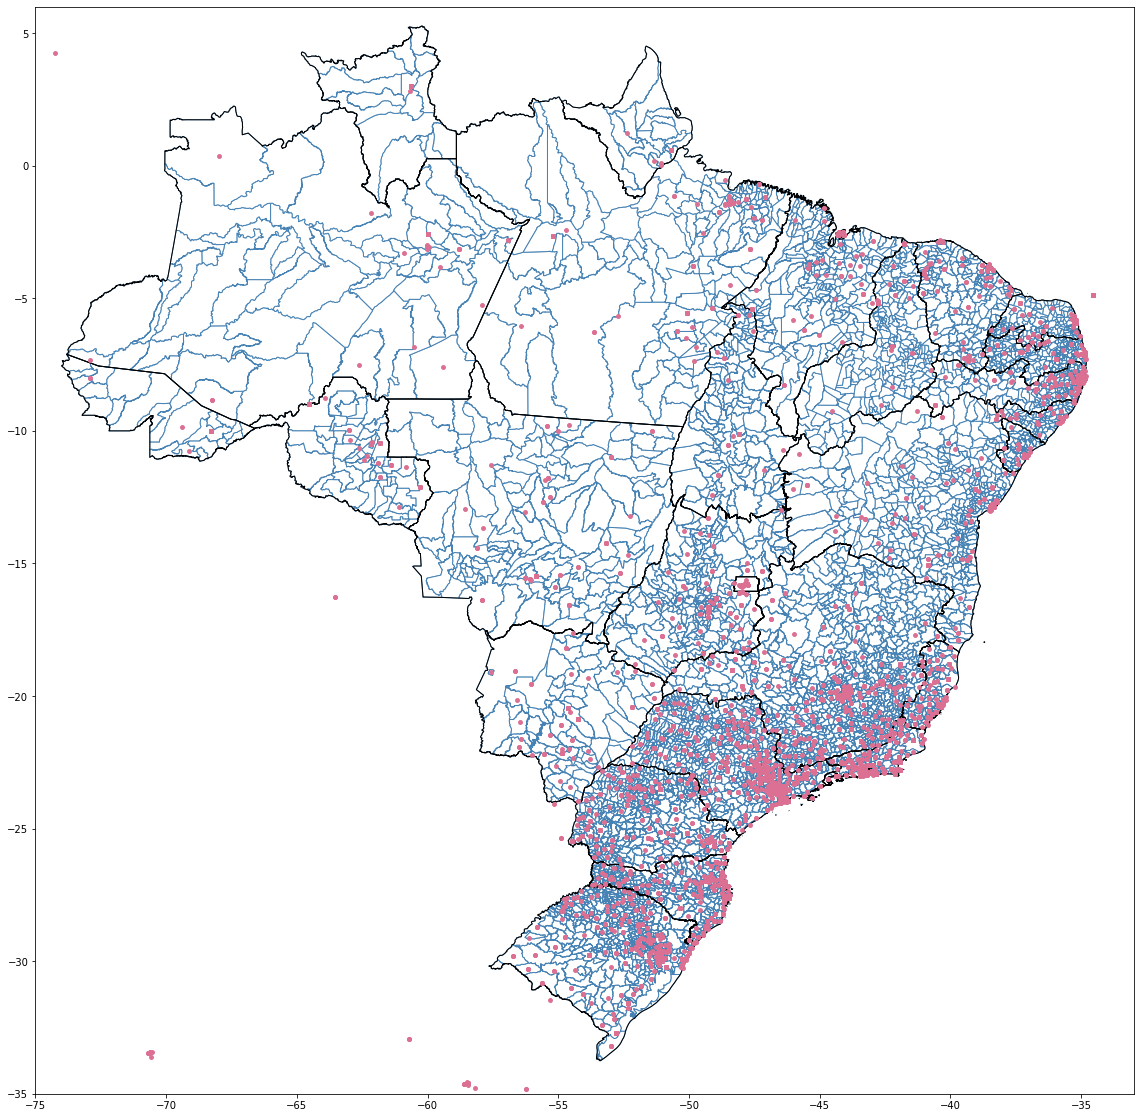

In [6]:
fig, ax = plt.subplots(figsize = (20,20))

ax.set_xlim([-75,-33])
ax.set_ylim([-35,6])

base1 = mapa_mun.plot(ax = ax,color='white', edgecolor='#4682B4', figsize = (20,20))
base = mapa_est.plot(ax=ax, facecolor='none', edgecolor='black', figsize = (20,20))
twts.plot(ax=ax, marker='o', color='#DB7093', markersize=15)

In [7]:
len(twts)

14802